In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import random
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
warnings.filterwarnings("ignore")

plt.ion()

In [3]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)

In [4]:
set_seed()

In [40]:
df=pd.read_csv("train.csv")
df

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,M,B,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,M,B,1,0.137350,0.011550,0.09990,0.0,...,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,M,B,1,0.158350,0.010425,0.02420,0.0,...,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,M,B,1,0.444900,0.035850,0.23980,0.0,...,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,M,B,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246832,98527316143,30,0,B,D,1,0.100000,0.015000,0.23375,0.0,...,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,4.086504,156.164384
1246833,98527316168,1,0,B,D,1,0.370533,0.048900,0.12320,0.0,...,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,3.959112,43.835616
1246834,98527316168,2,0,B,D,1,0.371137,0.040704,0.09790,0.0,...,0.0,0.0,2.5,0.2,0.0,0.0,0.0,0.0,3.959112,43.835616
1246835,98527316168,3,0,B,D,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.959112,43.835616


In [6]:
df.describe()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
count,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,...,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06,1.246837e+06
mean,9.852168e+10,1.105455e+01,4.223696e-01,9.868451e-01,4.726720e+00,5.350111e-01,3.700804e+00,4.262171e-02,4.482682e-01,7.602949e-01,...,1.604540e-03,1.379019e-01,2.268259e+00,7.415130e-01,3.447181e-01,2.749940e-01,3.990834e-02,1.652854e-02,6.508164e+00,2.081873e+02
std,6.339280e+06,7.850787e+00,4.939370e-01,1.139379e-01,2.609701e+01,2.557525e+00,2.222386e+01,8.355851e-01,2.193891e+00,3.407900e+00,...,1.532719e-02,1.171732e+00,4.263824e+00,1.567570e+00,5.121462e+00,4.754888e+00,4.349036e-01,1.926375e-01,1.162251e+01,2.269953e+02
min,9.848127e+10,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.604128e+00,0.000000e+00
25%,9.851986e+10,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.012769e+00,3.835616e+01
50%,9.852279e+10,1.000000e+01,0.000000e+00,1.000000e+00,4.500000e-01,5.970000e-02,1.888000e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,7.000000e-01,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.202048e+00,1.150685e+02
75%,9.852542e+10,1.700000e+01,1.000000e+00,1.000000e+00,1.962600e+00,2.637500e-01,1.276900e+00,0.000000e+00,0.000000e+00,5.000000e-01,...,0.000000e+00,0.000000e+00,2.300000e+00,8.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.042758e+00,3.068493e+02
max,9.852732e+10,3.000000e+01,1.000000e+00,1.000000e+00,2.819799e+03,2.096527e+02,2.086580e+03,3.531417e+02,2.000000e+02,1.250000e+02,...,1.300000e+00,6.450000e+02,1.077000e+02,4.510000e+01,6.140000e+02,6.732000e+02,3.330000e+01,1.870000e+01,8.340632e+02,1.000000e+03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246837 entries, 0 to 1246836
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UNIQUE_IDENTIFIER         1246837 non-null  int64  
 1   SEQUENCE_NO               1246837 non-null  int64  
 2   STATUS_CHECK              1246837 non-null  int64  
 3   CATEGORY_1                1246837 non-null  object 
 4   CATEGORY_2                1246837 non-null  object 
 5   ACTIVE_YN                 1246837 non-null  int64  
 6   ENTRY                     1246837 non-null  float64
 7   REVENUE                   1246837 non-null  float64
 8   WINNINGS_1                1246837 non-null  float64
 9   WINNINGS_2                1246837 non-null  float64
 10  DISCOUNT                  1246837 non-null  float64
 11  DEPOSIT                   1246837 non-null  float64
 12  DEPOSIT_NUMBER            1246837 non-null  float64
 13  DEPOSIT_2                 1

<AxesSubplot:ylabel='Density'>

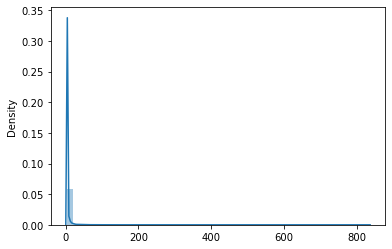

In [8]:
sns.distplot(x=df["Y1"])

<AxesSubplot:ylabel='Density'>

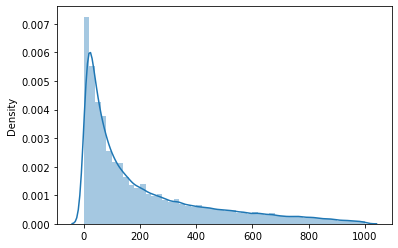

In [9]:
sns.distplot(x=df["Y2"])

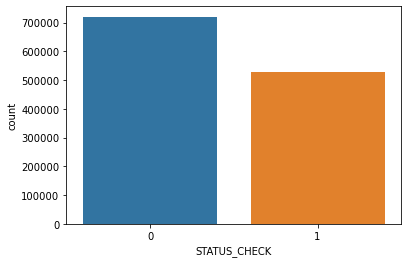

In [11]:
sns.countplot(x="STATUS_CHECK", data=df)
plt.show()

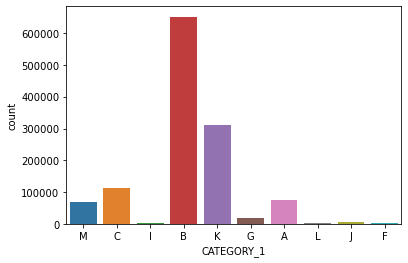

In [12]:
sns.countplot(x="CATEGORY_1", data=df)
plt.show()

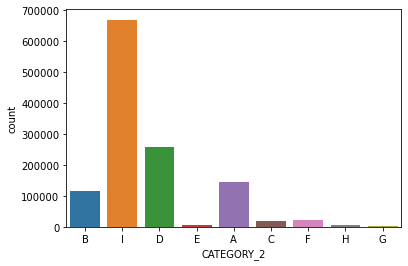

In [13]:
sns.countplot(x="CATEGORY_2", data=df)
plt.show()

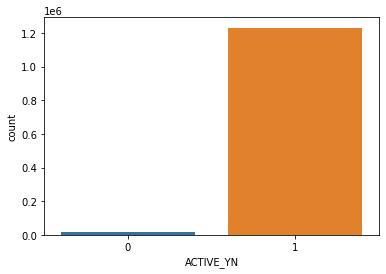

In [14]:
sns.countplot(x="ACTIVE_YN", data=df)
plt.show()

In [15]:
df["DEPOSIT_TRAILS"].nunique()

1221

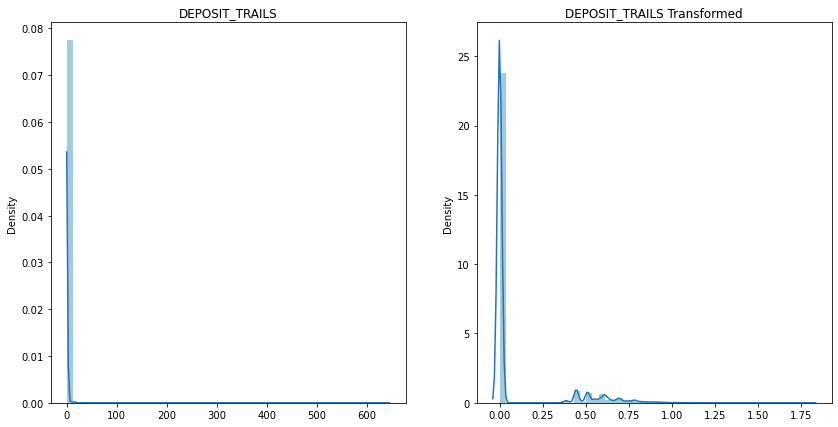

In [23]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("DEPOSIT_TRAILS")
sns.distplot(x=df["DEPOSIT_TRAILS"],ax=ax[0])
ax[1].set_title("DEPOSIT_TRAILS Transformed")
sns.distplot(x=np.log(1+np.power(df["DEPOSIT_TRAILS"],0.25)), ax=ax[1])
plt.show()

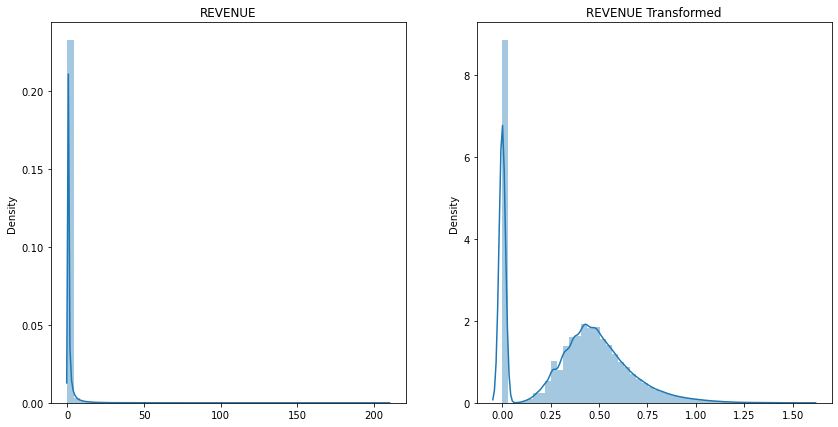

In [24]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("REVENUE")
sns.distplot(x=df["REVENUE"],ax=ax[0])
ax[1].set_title("REVENUE Transformed")
sns.distplot(x=np.log(1+np.power(df["REVENUE"],0.25)), ax=ax[1])
plt.show()

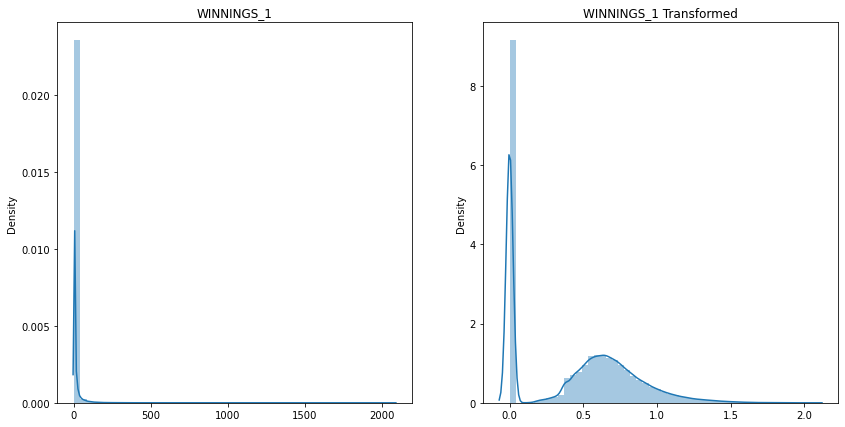

In [25]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("WINNINGS_1")
sns.distplot(x=df["WINNINGS_1"],ax=ax[0])
ax[1].set_title("WINNINGS_1 Transformed")
sns.distplot(x=np.log(1+np.power(df["WINNINGS_1"],0.25)), ax=ax[1])
plt.show()

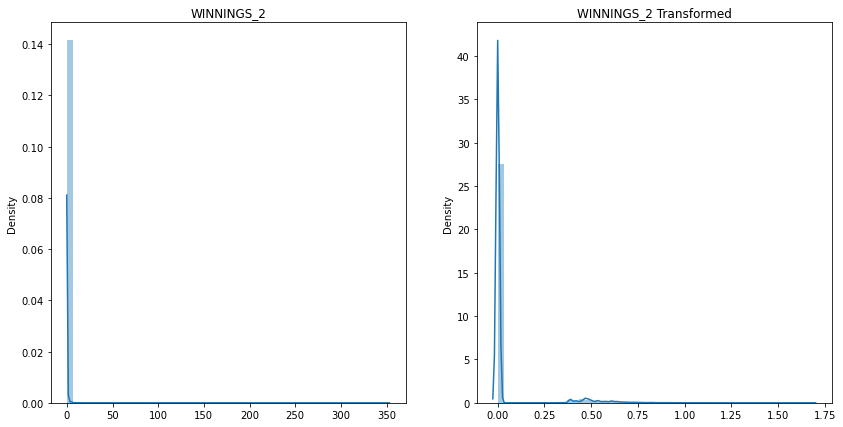

In [26]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("WINNINGS_2")
sns.distplot(x=df["WINNINGS_2"],ax=ax[0])
ax[1].set_title("WINNINGS_2 Transformed")
sns.distplot(x=np.log(1+np.power(df["WINNINGS_2"],0.25)), ax=ax[1])
plt.show()

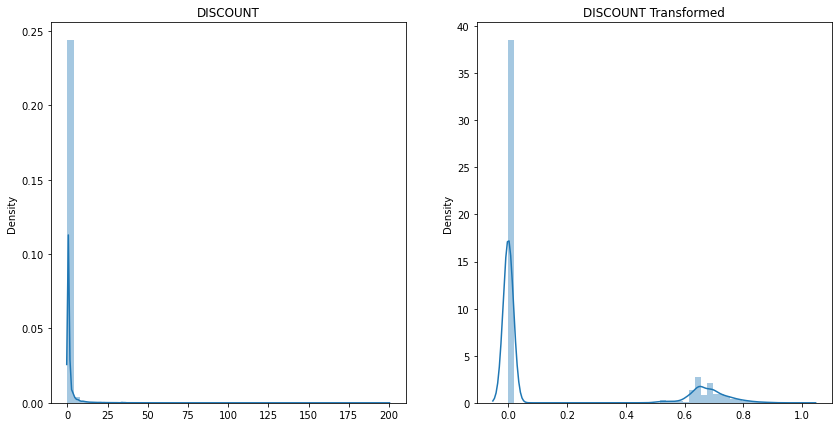

In [27]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("DISCOUNT")
sns.distplot(x=df["DISCOUNT"],ax=ax[0])
ax[1].set_title("DISCOUNT Transformed")
sns.distplot(x=np.log(1+np.power(df["DISCOUNT"],0.1)), ax=ax[1])
plt.show()

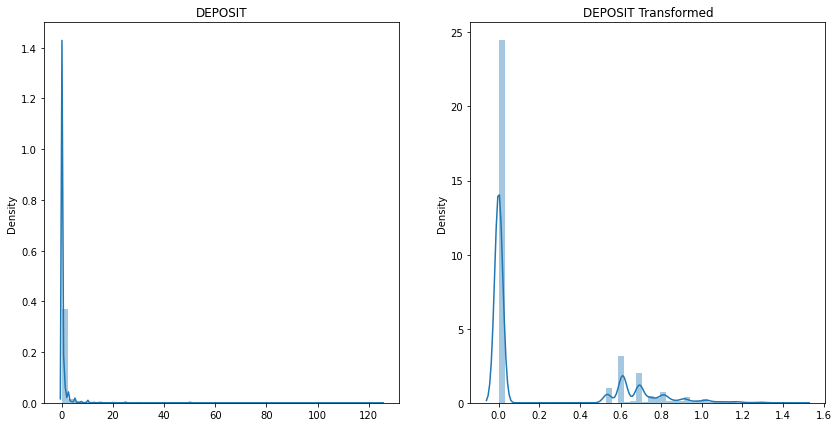

In [28]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("DEPOSIT")
sns.distplot(x=df["DEPOSIT"],ax=ax[0])
ax[1].set_title("DEPOSIT Transformed")
sns.distplot(x=np.log(1+np.power(df["DEPOSIT"],0.25)), ax=ax[1])
plt.show()

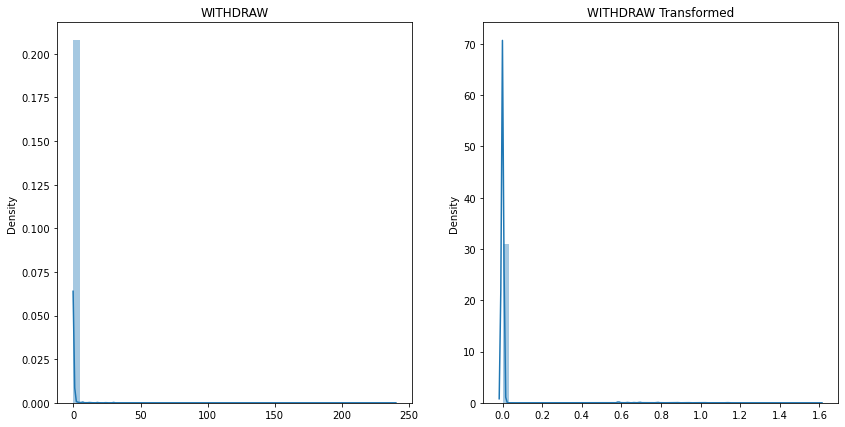

In [29]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("WITHDRAW")
sns.distplot(x=df["WITHDRAW"],ax=ax[0])
ax[1].set_title("WITHDRAW Transformed")
sns.distplot(x=np.log(1+np.power(df["WITHDRAW"],0.25)), ax=ax[1])
plt.show()

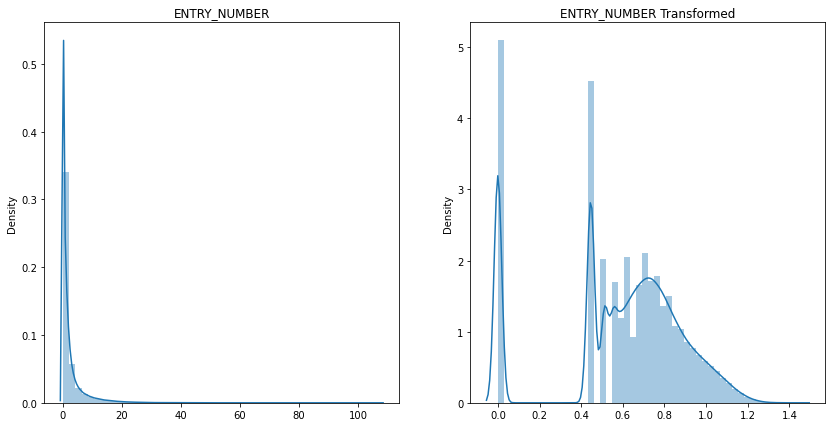

In [30]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("ENTRY_NUMBER")
sns.distplot(x=df["ENTRY_NUMBER"],ax=ax[0])
ax[1].set_title("ENTRY_NUMBER Transformed")
sns.distplot(x=np.log(1+np.power(df["ENTRY_NUMBER"],0.25)), ax=ax[1])
plt.show()

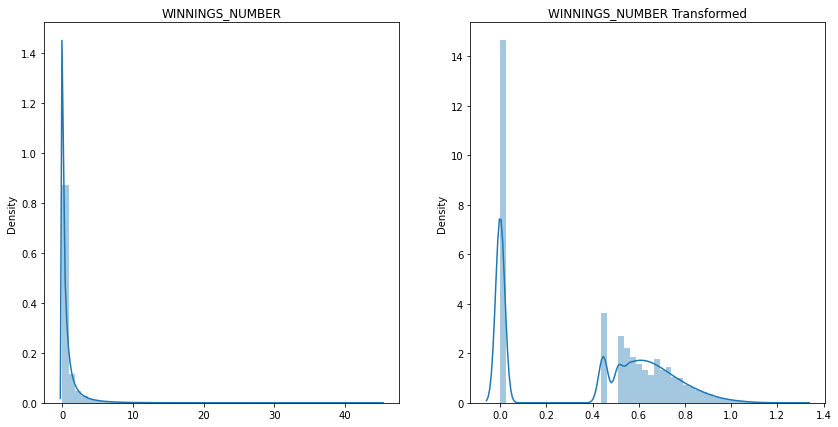

In [31]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("WINNINGS_NUMBER")
sns.distplot(x=df["WINNINGS_NUMBER"],ax=ax[0])
ax[1].set_title("WINNINGS_NUMBER Transformed")
sns.distplot(x=np.log(1+np.power(df["WINNINGS_NUMBER"],0.25)), ax=ax[1])
plt.show()

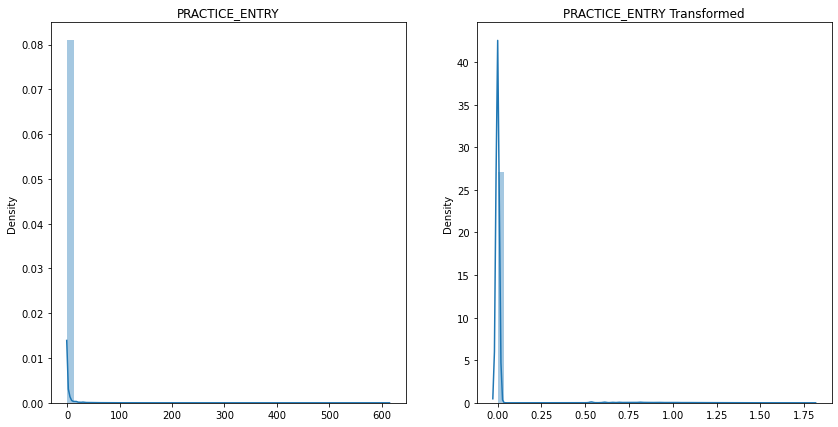

In [32]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("PRACTICE_ENTRY")
sns.distplot(x=df["PRACTICE_ENTRY"],ax=ax[0])
ax[1].set_title("PRACTICE_ENTRY Transformed")
sns.distplot(x=np.log(1+np.power(df["PRACTICE_ENTRY"],0.25)), ax=ax[1])
plt.show()

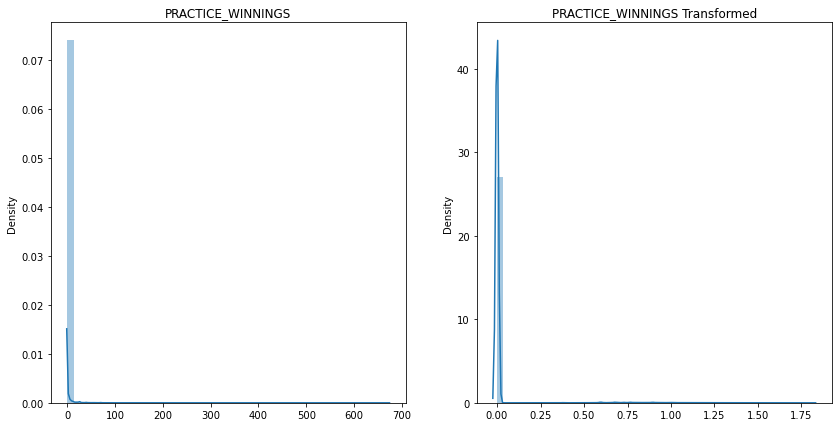

In [22]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("PRACTICE_WINNINGS")
sns.distplot(x=df["PRACTICE_WINNINGS"],ax=ax[0])
ax[1].set_title("PRACTICE_WINNINGS Transformed")
sns.distplot(x=np.log(1+np.power(df["PRACTICE_WINNINGS"],0.25)), ax=ax[1])
plt.show()

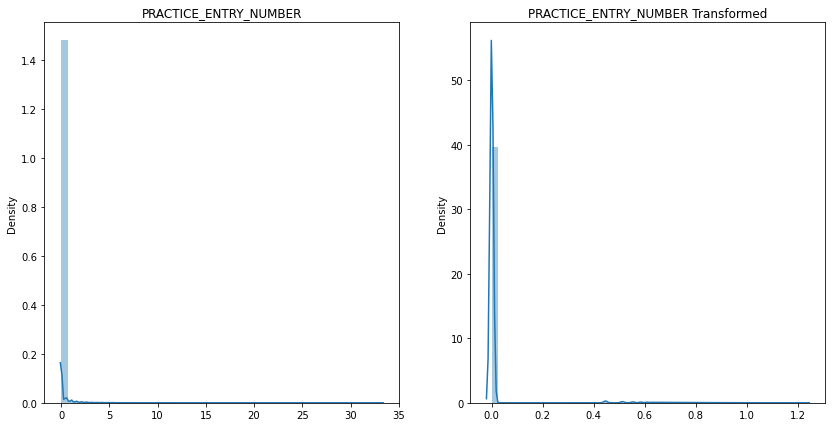

In [21]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("PRACTICE_ENTRY_NUMBER")
sns.distplot(x=df["PRACTICE_ENTRY_NUMBER"],ax=ax[0])
ax[1].set_title("PRACTICE_ENTRY_NUMBER Transformed")
sns.distplot(x=np.log(1+np.power(df["PRACTICE_ENTRY_NUMBER"],0.25)), ax=ax[1])
plt.show()

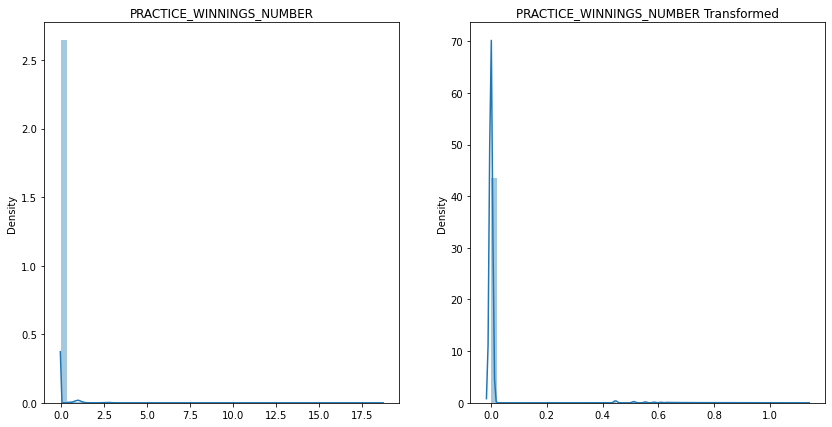

In [20]:
plt.rcParams['figure.figsize'] = [14,7]
fig,ax=plt.subplots(1,2)
ax[0].set_title("PRACTICE_WINNINGS_NUMBER")
sns.distplot(x=df["PRACTICE_WINNINGS_NUMBER"],ax=ax[0])
ax[1].set_title("PRACTICE_WINNINGS_NUMBER Transformed")
sns.distplot(x=np.log(1+np.power(df["PRACTICE_WINNINGS_NUMBER"],0.25)), ax=ax[1])
plt.show()

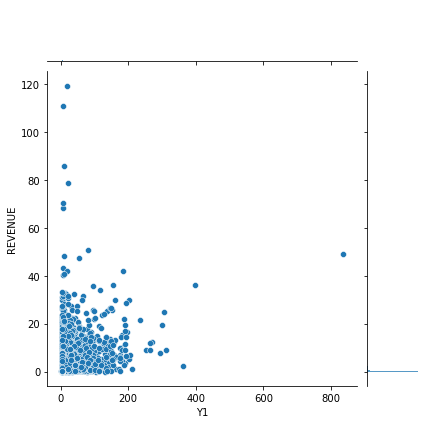

In [34]:
sns.jointplot(data=df, y="REVENUE", x="Y1")

In [35]:
categorical_variables=["STATUS_CHECK", "CATEGORY_1", "CATEGORY_2", "ACTIVE_YN"]

ValueError: Could not interpret input 'CATEGORY_1'

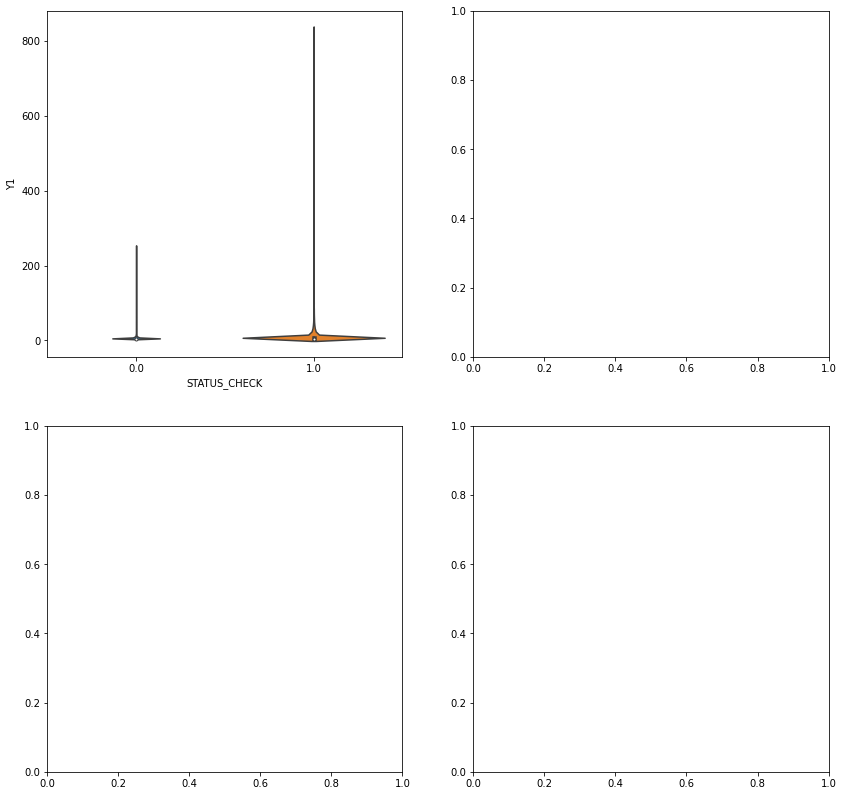

In [36]:
plt.rcParams['figure.figsize'] = [14,14]
fig,ax=plt.subplots(2,2)
for i in range(4):
    sns.violinplot(x=categorical_variables[i], y="Y1", data=df,ax=ax[i//2][i%2])
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [14,14]
fig,ax=plt.subplots(2,2)
for i in range(4):
    sns.violinplot(x=categorical_variables[i], y="Y2", data=df,ax=ax[i//2][i%2])
plt.show()

In [37]:
le_cat1=LabelEncoder()
le_cat1.fit(df["CATEGORY_1"])

KeyError: 'CATEGORY_1'

In [38]:
le_cat2=LabelEncoder()
le_cat2.fit(df["CATEGORY_2"])

KeyError: 'CATEGORY_2'

In [ ]:
continuous_variables=["REVENUE", "WINNINGS_1", "DEPOSIT_2", "DISCOUNT", "DEPOSIT", "WITHDRAW", "ENTRY_NUMBER", "ENTRY_NUMBER", "WINNINGS_NUMBER"]

In [ ]:
df["CATEGORY_1"]=le_cat1.transform(df["CATEGORY_1"])
df["CATEGORY_2"]=le_cat2.transform(df["CATEGORY_2"])

In [39]:
df=df.groupby(["UNIQUE_IDENTIFIER"]).mean().reset_index(drop=True)
df

KeyError: 'UNIQUE_IDENTIFIER'

In [37]:
num_bins = int(np.floor(1 + np.log2(len(df)))) 
df.loc[:, "bins"] = pd.cut(df["Y2"], bins=num_bins, labels=False)

In [38]:
trans_df=df

In [39]:
for col in continuous_variables:
    trans_df[f"t_{col}"]=np.log(1+np.power(df[col],0.25))

In [40]:
drop_cols=["SEQUENCE_NO", "PRACTICE_ENTRY", "PRACTICE_WINNINGS", "PRACTICE_ENTRY_NUMBER", "PRACTICE_WINNINGS_NUMBER", "CATEGORY_1", "CATEGORY_2"]

In [41]:
trans_df=trans_df.drop(columns=continuous_variables+drop_cols,axis=1)

In [ ]:
trans_df

<AxesSubplot:>

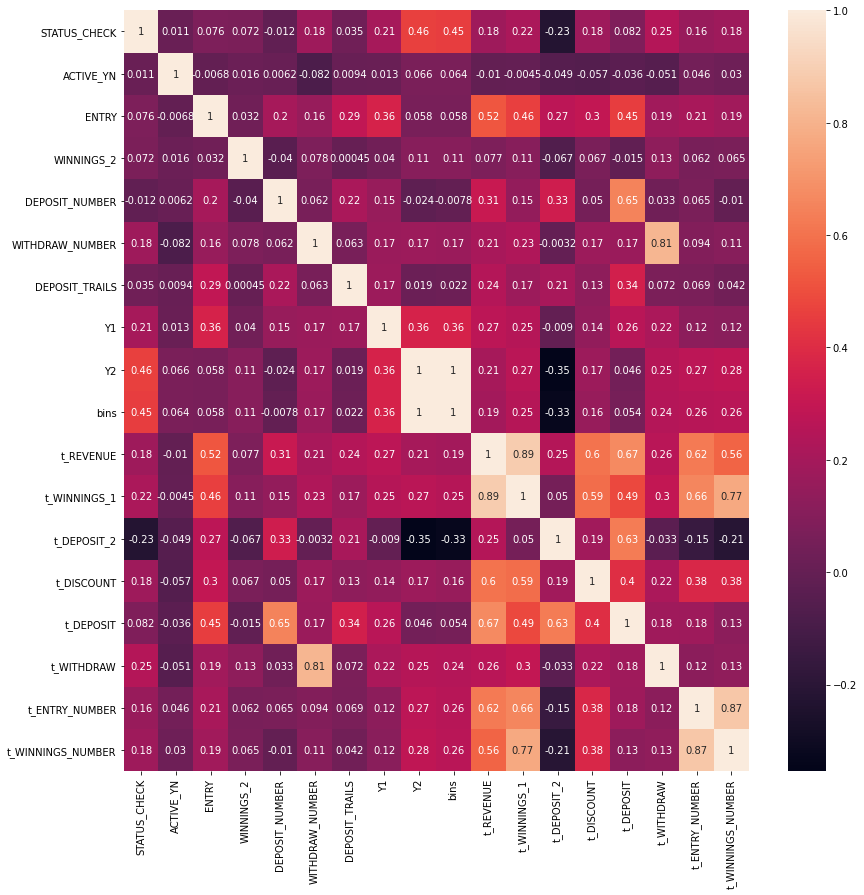

In [43]:
sns.heatmap(trans_df.corr(),annot=True)

In [44]:
train_df,val_df=train_test_split(trans_df,test_size=0.2,stratify=trans_df["bins"])

In [45]:
y1_train=train_df["Y1"].values
y1_val=val_df["Y1"].values
y2_train=train_df["Y2"].values
y2_val=val_df["Y2"].values

In [46]:
X_train=train_df.drop(columns=["Y1","Y2","bins"]).values
X_val=val_df.drop(columns=["Y1","Y2","bins"]).values

# XGBOOST

In [47]:
xgb1=XGBRegressor(n_estimators=200, max_depth=9 ,verbosity=0,learning_rate=0.10)
xgb1.fit(X_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [48]:
pred_val=xgb1.predict(X_val)

In [49]:
mean_squared_error(y1_val, pred_val, squared=False)

6.276754751384249

In [50]:
xgb2=XGBRegressor()
xgb2.fit(X_train,y2_train)
pred_val=xgb2.predict(X_val)
mean_squared_error(y2_val, pred_val, squared=False)

130.4063879836215

In [42]:
test_df=pd.read_csv("test.csv")
test_df

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
0,98481269471,1,0,M,D,1,5.975,0.90500,0.4100,0.0,...,1.0,0.0,0.0,9.8,1.4,0.2,0.0,0.0,0.0,0.0
1,98481269471,2,0,M,D,0,0.000,0.00000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98481270499,1,1,M,D,1,0.050,0.00750,0.0850,0.0,...,1.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0
3,98481270499,2,1,M,D,1,1.750,0.26250,1.0200,0.0,...,0.0,0.0,0.0,0.0,3.5,1.2,0.0,0.0,0.0,0.0
4,98481272694,1,0,M,C,1,0.125,0.01875,0.0425,0.0,...,10.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979054,98537205065,26,1,K,A,1,0.000,0.00000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979055,98537205065,27,1,K,A,1,0.000,0.00000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
979056,98537205065,28,1,K,A,1,0.050,0.00750,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
979057,98537205065,29,1,K,A,1,0.000,0.00000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
test_df=test_df.groupby(["UNIQUE_IDENTIFIER"]).mean()

In [53]:
print(len(test_df))

65242


In [54]:
for col in continuous_variables:
    test_df[f"t_{col}"]=np.log(1+np.power(test_df[col],0.25))

In [55]:
test_df.head()

,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,...,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,t_REVENUE,t_WINNINGS_1,t_DEPOSIT_2,t_DISCOUNT,t_DEPOSIT,t_WITHDRAW,t_ENTRY_NUMBER,t_WINNINGS_NUMBER
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
98481269471,1.5,0.0,0.500000,2.987500,0.452500,0.205000,0.000000,1.200000,2.750000,0.150000,...,0.000000,0.000000,0.598931,0.514547,0.610253,0.716197,0.827571,0.0,0.649556,0.446186
98481270499,1.5,1.0,1.000000,0.900000,0.135000,0.552500,0.000000,0.000000,0.500000,0.050000,...,0.000000,0.000000,0.473843,0.621732,0.610253,0.000000,0.610253,0.0,0.769317,0.640748
98481272694,10.0,0.0,1.000000,0.006579,0.000987,0.002237,0.000000,0.210526,0.526316,0.005263,...,1.905263,0.557895,0.163173,0.196779,0.616131,0.517228,0.616131,0.0,0.338447,0.238502
98481273365,14.0,0.0,0.962963,0.565898,0.086024,0.329983,0.250556,0.111852,0.222222,0.018519,...,0.000000,0.000000,0.432802,0.564131,0.314003,0.456355,0.522708,0.0,0.594070,0.470025
98481278321,3.0,0.0,0.800000,0.660956,0.062309,0.112740,0.000000,0.360000,0.500000,0.060000,...,0.000000,0.000000,0.405210,0.457080,0.512069,0.573573,0.610253,0.0,0.862777,0.718312


In [56]:
drop_cols_test=["SEQUENCE_NO", "PRACTICE_ENTRY", "PRACTICE_WINNINGS", "PRACTICE_ENTRY_NUMBER", "PRACTICE_WINNINGS_NUMBER"]

In [57]:
test_df=test_df.drop(columns=continuous_variables+drop_cols_test,axis=1)

In [58]:
test_df.head()

,STATUS_CHECK,ACTIVE_YN,ENTRY,WINNINGS_2,DEPOSIT_NUMBER,WITHDRAW_NUMBER,DEPOSIT_TRAILS,t_REVENUE,t_WINNINGS_1,t_DEPOSIT_2,t_DISCOUNT,t_DEPOSIT,t_WITHDRAW,t_ENTRY_NUMBER,t_WINNINGS_NUMBER
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,
98481269471,0.0,0.500000,2.987500,0.000000,0.150000,0.0,4.900000,0.598931,0.514547,0.610253,0.716197,0.827571,0.0,0.649556,0.446186
98481270499,1.0,1.000000,0.900000,0.000000,0.050000,0.0,0.000000,0.473843,0.621732,0.610253,0.000000,0.610253,0.0,0.769317,0.640748
98481272694,0.0,1.000000,0.006579,0.000000,0.005263,0.0,0.000000,0.163173,0.196779,0.616131,0.517228,0.616131,0.0,0.338447,0.238502
98481273365,0.0,0.962963,0.565898,0.250556,0.018519,0.0,0.033333,0.432802,0.564131,0.314003,0.456355,0.522708,0.0,0.594070,0.470025
98481278321,0.0,0.800000,0.660956,0.000000,0.060000,0.0,0.000000,0.405210,0.457080,0.512069,0.573573,0.610253,0.0,0.862777,0.718312


In [59]:
X_test=test_df.values
y1_pred=xgb1.predict(X_test)
y2_pred=xgb2.predict(X_test)

In [60]:
ids=list(test_df.index)

In [61]:
sub=pd.DataFrame(columns=["UNIQUE_IDENTIFIER","Y1","Y2"])
sub["UNIQUE_IDENTIFIER"]=ids
sub["Y1"]=np.clip(y1_pred,0,1e9)
sub["Y2"]=np.clip(y2_pred,0,1e9)
sub.head()

,UNIQUE_IDENTIFIER,Y1,Y2
0,98481269471,3.938311,0.000000
1,98481270499,4.502300,29.508051
2,98481272694,4.355296,444.996887
3,98481273365,4.331764,219.752350
4,98481278321,3.959683,12.292036


In [62]:
sub.to_csv("xgb.csv",index=None)

# CATBOOST

In [63]:
cat2=CatBoostRegressor(depth=7, learning_rate=0.05)
cat2.fit(X_train,y2_train,eval_set=(X_val,y2_val))
pred_val=cat2.predict(X_val)
mean_squared_error(y2_val, pred_val, squared=False)

0:	learn: 181.7064637	test: 181.4739784	best: 181.4739784 (0)	total: 77.4ms	remaining: 1m 17s
1:	learn: 178.3247084	test: 178.0520877	best: 178.0520877 (1)	total: 99.1ms	remaining: 49.4s
2:	learn: 175.1652914	test: 174.8764883	best: 174.8764883 (2)	total: 114ms	remaining: 37.9s
3:	learn: 172.2895656	test: 171.9642035	best: 171.9642035 (3)	total: 129ms	remaining: 32s
4:	learn: 169.6344393	test: 169.2946895	best: 169.2946895 (4)	total: 144ms	remaining: 28.6s
5:	learn: 167.2425115	test: 166.9034842	best: 166.9034842 (5)	total: 159ms	remaining: 26.3s
6:	learn: 164.9841359	test: 164.6376329	best: 164.6376329 (6)	total: 174ms	remaining: 24.7s
7:	learn: 162.9055902	test: 162.5370925	best: 162.5370925 (7)	total: 189ms	remaining: 23.4s
8:	learn: 161.0174065	test: 160.6450085	best: 160.6450085 (8)	total: 203ms	remaining: 22.4s
9:	learn: 159.2209566	test: 158.8461100	best: 158.8461100 (9)	total: 218ms	remaining: 21.6s
10:	learn: 157.5974047	test: 157.2147644	best: 157.2147644 (10)	total: 232ms	re

128.38256548732804

In [64]:
cat1=CatBoostRegressor(depth=5, learning_rate=0.05)
cat1.fit(X_train,y1_train,eval_set=(X_val,y1_val))
pred_val=cat1.predict(X_val)
mean_squared_error(y1_val, pred_val, squared=False)

0:	learn: 8.5304035	test: 7.4023743	best: 7.4023743 (0)	total: 10.6ms	remaining: 10.5s
1:	learn: 8.4089574	test: 7.2902218	best: 7.2902218 (1)	total: 19.8ms	remaining: 9.88s
2:	learn: 8.2989776	test: 7.1954632	best: 7.1954632 (2)	total: 29.2ms	remaining: 9.72s
3:	learn: 8.1957493	test: 7.1061333	best: 7.1061333 (3)	total: 37.7ms	remaining: 9.4s
4:	learn: 8.1021331	test: 7.0253400	best: 7.0253400 (4)	total: 46.2ms	remaining: 9.2s
5:	learn: 8.0140734	test: 6.9553124	best: 6.9553124 (5)	total: 54.9ms	remaining: 9.09s
6:	learn: 7.9302970	test: 6.8799231	best: 6.8799231 (6)	total: 63.4ms	remaining: 9s
7:	learn: 7.8573514	test: 6.8188914	best: 6.8188914 (7)	total: 72.5ms	remaining: 8.99s
8:	learn: 7.7872023	test: 6.7665648	best: 6.7665648 (8)	total: 80.9ms	remaining: 8.9s
9:	learn: 7.7212616	test: 6.7059696	best: 6.7059696 (9)	total: 90.7ms	remaining: 8.98s
10:	learn: 7.6583956	test: 6.6599277	best: 6.6599277 (10)	total: 99.5ms	remaining: 8.95s
11:	learn: 7.6023615	test: 6.6135599	best: 6.61

6.098257855761154

In [65]:
X_test=test_df.values
y1_pred=cat1.predict(X_test)
y2_pred=cat2.predict(X_test)

In [66]:
ids=list(test_df.index)
sub=pd.DataFrame(columns=["UNIQUE_IDENTIFIER","Y1","Y2"])
sub["UNIQUE_IDENTIFIER"]=ids
sub["Y1"]=np.clip(y1_pred,0,1e9)
sub["Y2"]=np.clip(y2_pred,0,1e9)
sub.head()

,UNIQUE_IDENTIFIER,Y1,Y2
0,98481269471,4.401517,0.000000
1,98481270499,4.703702,36.869810
2,98481272694,3.965175,393.112603
3,98481273365,4.180315,223.706128
4,98481278321,4.118776,11.336081


In [67]:
sub.to_csv("cat.csv",index=None)

# LGBM

In [68]:
lgbm2=LGBMRegressor()
lgbm2.fit(X_train,y2_train,eval_set=(X_val,y2_val))
pred_val=lgbm2.predict(X_val)
mean_squared_error(y2_val, pred_val, squared=False)

[1]	valid_0's l2: 31462.3
[2]	valid_0's l2: 29145
[3]	valid_0's l2: 27335.4
[4]	valid_0's l2: 25797.5
[5]	valid_0's l2: 24530.6
[6]	valid_0's l2: 23463.9
[7]	valid_0's l2: 22584
[8]	valid_0's l2: 21825.6
[9]	valid_0's l2: 21223.3
[10]	valid_0's l2: 20686.6
[11]	valid_0's l2: 20236
[12]	valid_0's l2: 19839.3
[13]	valid_0's l2: 19508
[14]	valid_0's l2: 19203.9
[15]	valid_0's l2: 18951.8
[16]	valid_0's l2: 18761.4
[17]	valid_0's l2: 18565.5
[18]	valid_0's l2: 18404.7
[19]	valid_0's l2: 18263
[20]	valid_0's l2: 18128.8
[21]	valid_0's l2: 17958.8
[22]	valid_0's l2: 17875.8
[23]	valid_0's l2: 17802
[24]	valid_0's l2: 17669
[25]	valid_0's l2: 17578.1
[26]	valid_0's l2: 17496.8
[27]	valid_0's l2: 17447.6
[28]	valid_0's l2: 17397.5
[29]	valid_0's l2: 17335.9
[30]	valid_0's l2: 17293.7
[31]	valid_0's l2: 17247.7
[32]	valid_0's l2: 17208.4
[33]	valid_0's l2: 17176.4
[34]	valid_0's l2: 17145.2
[35]	valid_0's l2: 17118.9
[36]	valid_0's l2: 17088.6
[37]	valid_0's l2: 17062.2
[38]	valid_0's l2: 17026

129.06535850139872

In [69]:
lgbm1=LGBMRegressor()
lgbm1.fit(X_train,y1_train,eval_set=(X_val,y1_val))
pred_val=lgbm1.predict(X_val)
mean_squared_error(y1_val, pred_val, squared=False)

[1]	valid_0's l2: 52.6974
[2]	valid_0's l2: 49.3858
[3]	valid_0's l2: 46.635
[4]	valid_0's l2: 44.4067
[5]	valid_0's l2: 42.8238
[6]	valid_0's l2: 41.366
[7]	valid_0's l2: 40.1426
[8]	valid_0's l2: 39.3102
[9]	valid_0's l2: 38.553
[10]	valid_0's l2: 38.0929
[11]	valid_0's l2: 37.7339
[12]	valid_0's l2: 37.5531
[13]	valid_0's l2: 37.3926
[14]	valid_0's l2: 37.1833
[15]	valid_0's l2: 37.1106
[16]	valid_0's l2: 36.9298
[17]	valid_0's l2: 36.8756
[18]	valid_0's l2: 36.6312
[19]	valid_0's l2: 36.4807
[20]	valid_0's l2: 36.348
[21]	valid_0's l2: 36.4039
[22]	valid_0's l2: 36.2945
[23]	valid_0's l2: 36.2506
[24]	valid_0's l2: 36.1987
[25]	valid_0's l2: 36.2209
[26]	valid_0's l2: 36.3198
[27]	valid_0's l2: 36.3204
[28]	valid_0's l2: 36.3499
[29]	valid_0's l2: 36.244
[30]	valid_0's l2: 36.321
[31]	valid_0's l2: 36.3497
[32]	valid_0's l2: 36.3666
[33]	valid_0's l2: 36.3557
[34]	valid_0's l2: 36.373
[35]	valid_0's l2: 36.4444
[36]	valid_0's l2: 36.5033
[37]	valid_0's l2: 36.5388
[38]	valid_0's l2

6.278848814303948